# We have access to GPU

In [5]:
!nvidia-smi

Sat Oct 14 13:05:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [16]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [15]:
from ultralytics import YOLO

from IPython.display import display, Image

# Fetch labeled dataset from Roboflow

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iPbpyfMRIytARKQZ9UKE")
project = rf.workspace("nust-dsai-training-program").project("gb-road-turns-detection")
dataset = project.version(5).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to GB-Road-Turns-Detection-5 in yolov8:: 100%|██████████| 718/718 [00:00<00:00, 9859.77it/s]


# Set Dataset path

In [4]:
import os

# set the dataset location
dataset_location = os.path.join(os.getcwd(), "/content/datasets/GB-Road-Turns-Detection-5")

In [5]:
# set the path to the data.yaml file
data_yaml_path = os.path.join(dataset_location, "data", "data.yaml")

# Custom Training(Yolov8 model)

In [6]:
# train the model
!yolo task=detect mode=train model=yolov8n.pt data={data_yaml_path} epochs=50 imgsz=800 plots=True conf=0.25


100% 6.23M/6.23M [00:00<00:00, 76.3MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/GB-Road-Turns-Detection-5/data/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

# Training Output Result files

In [12]:
!ls {HOME}/runs/detect/train

args.yaml					    R_curve.png       train_batch840.jpg
confusion_matrix.png				    results.csv       train_batch841.jpg
events.out.tfevents.1697288855.e81714d231f4.1873.0  results.png       train_batch842.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


# Overall Result

/content


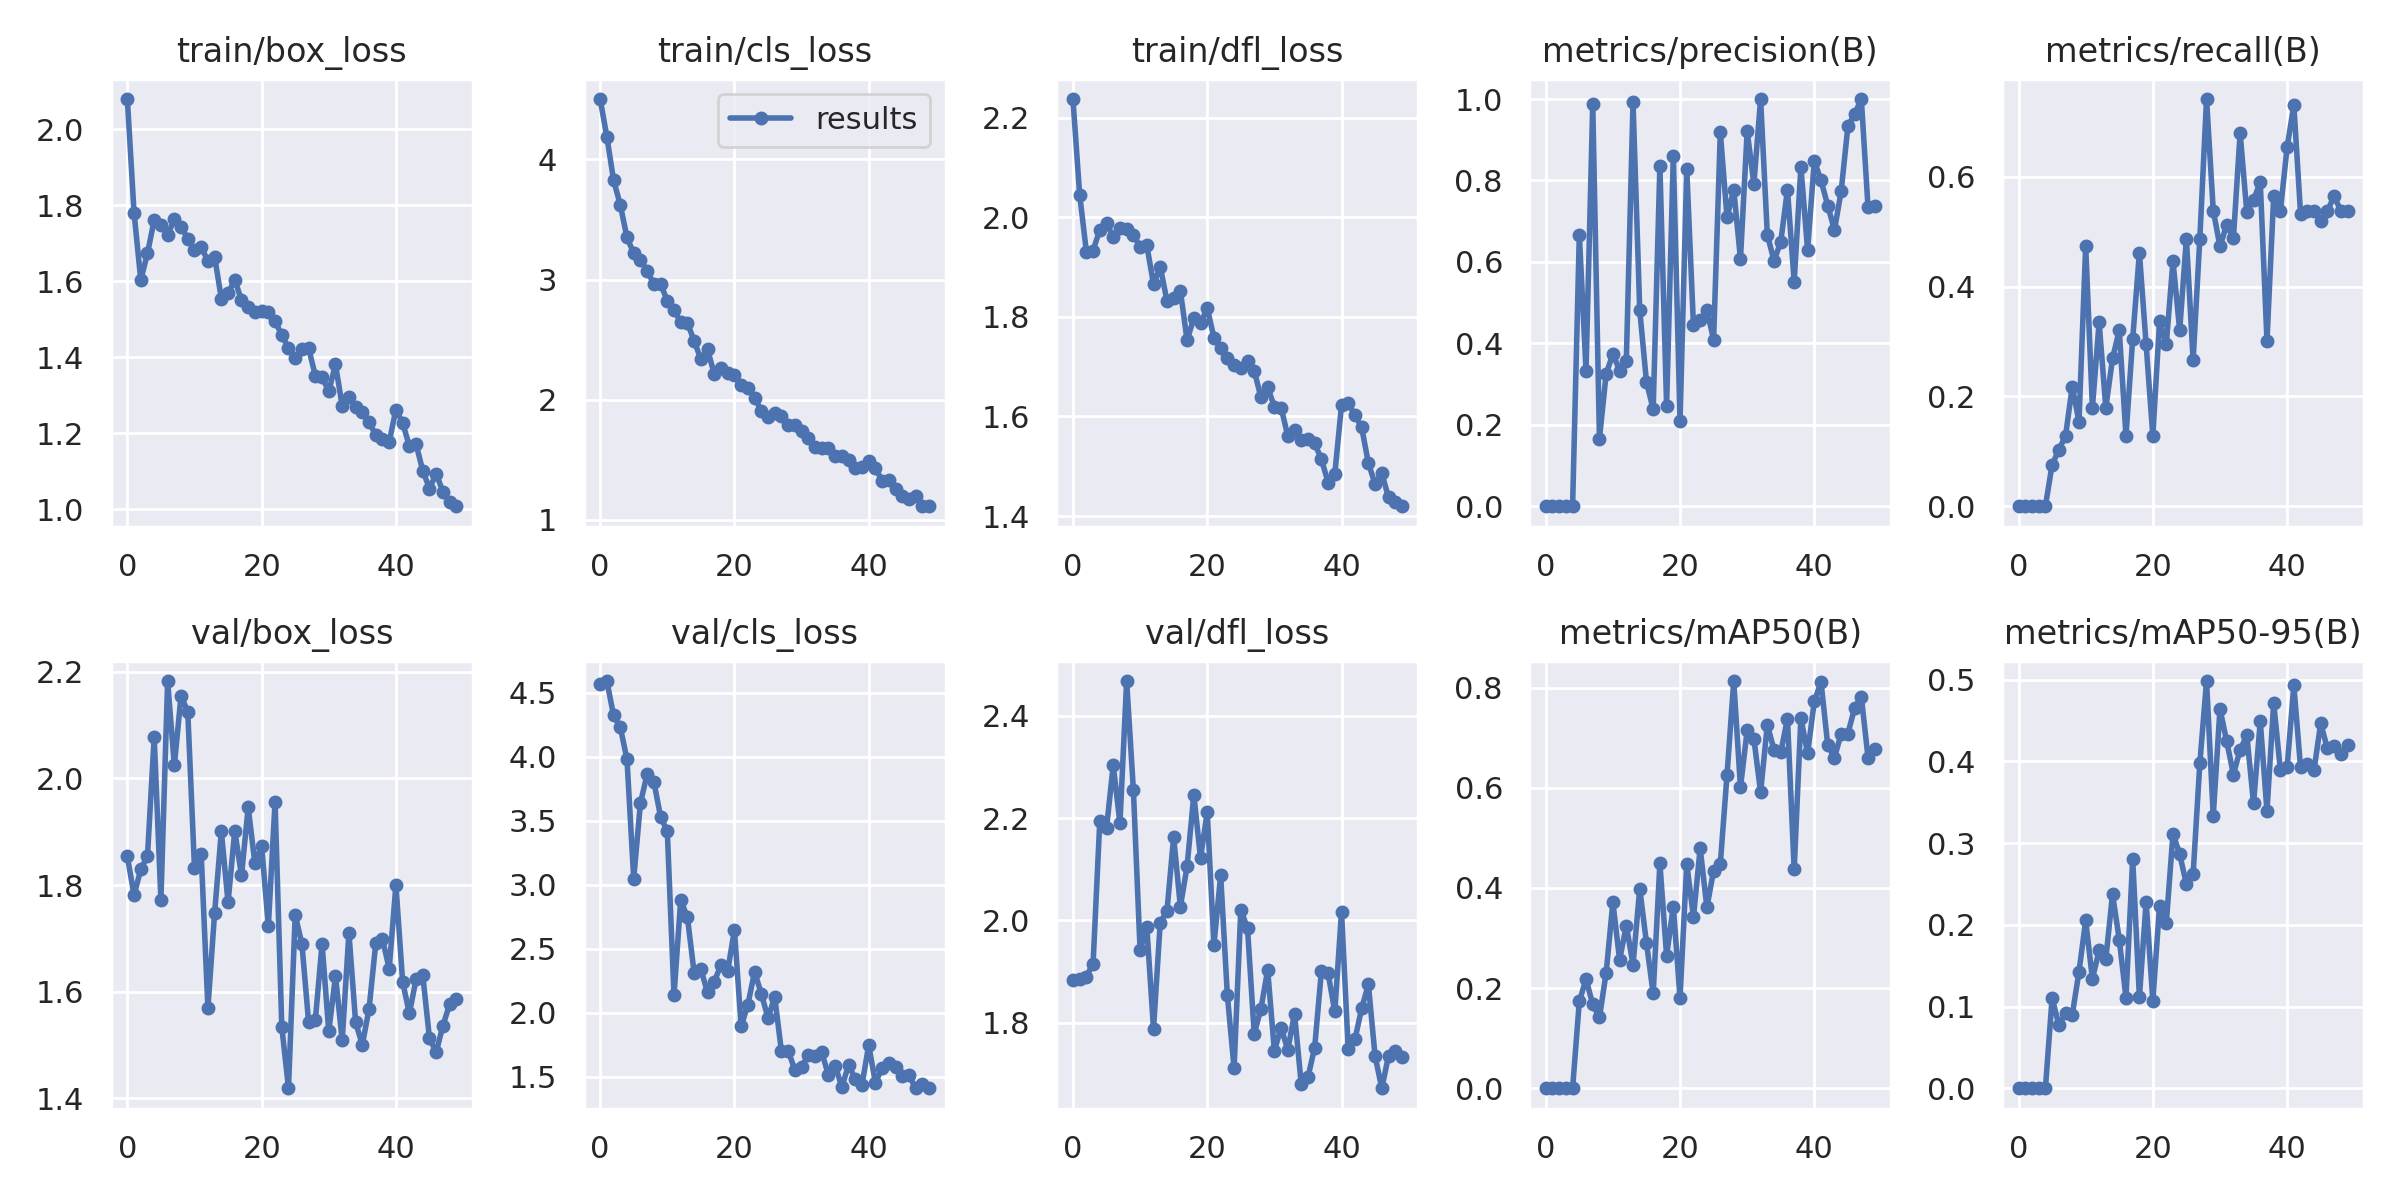

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# Confusion Metrix

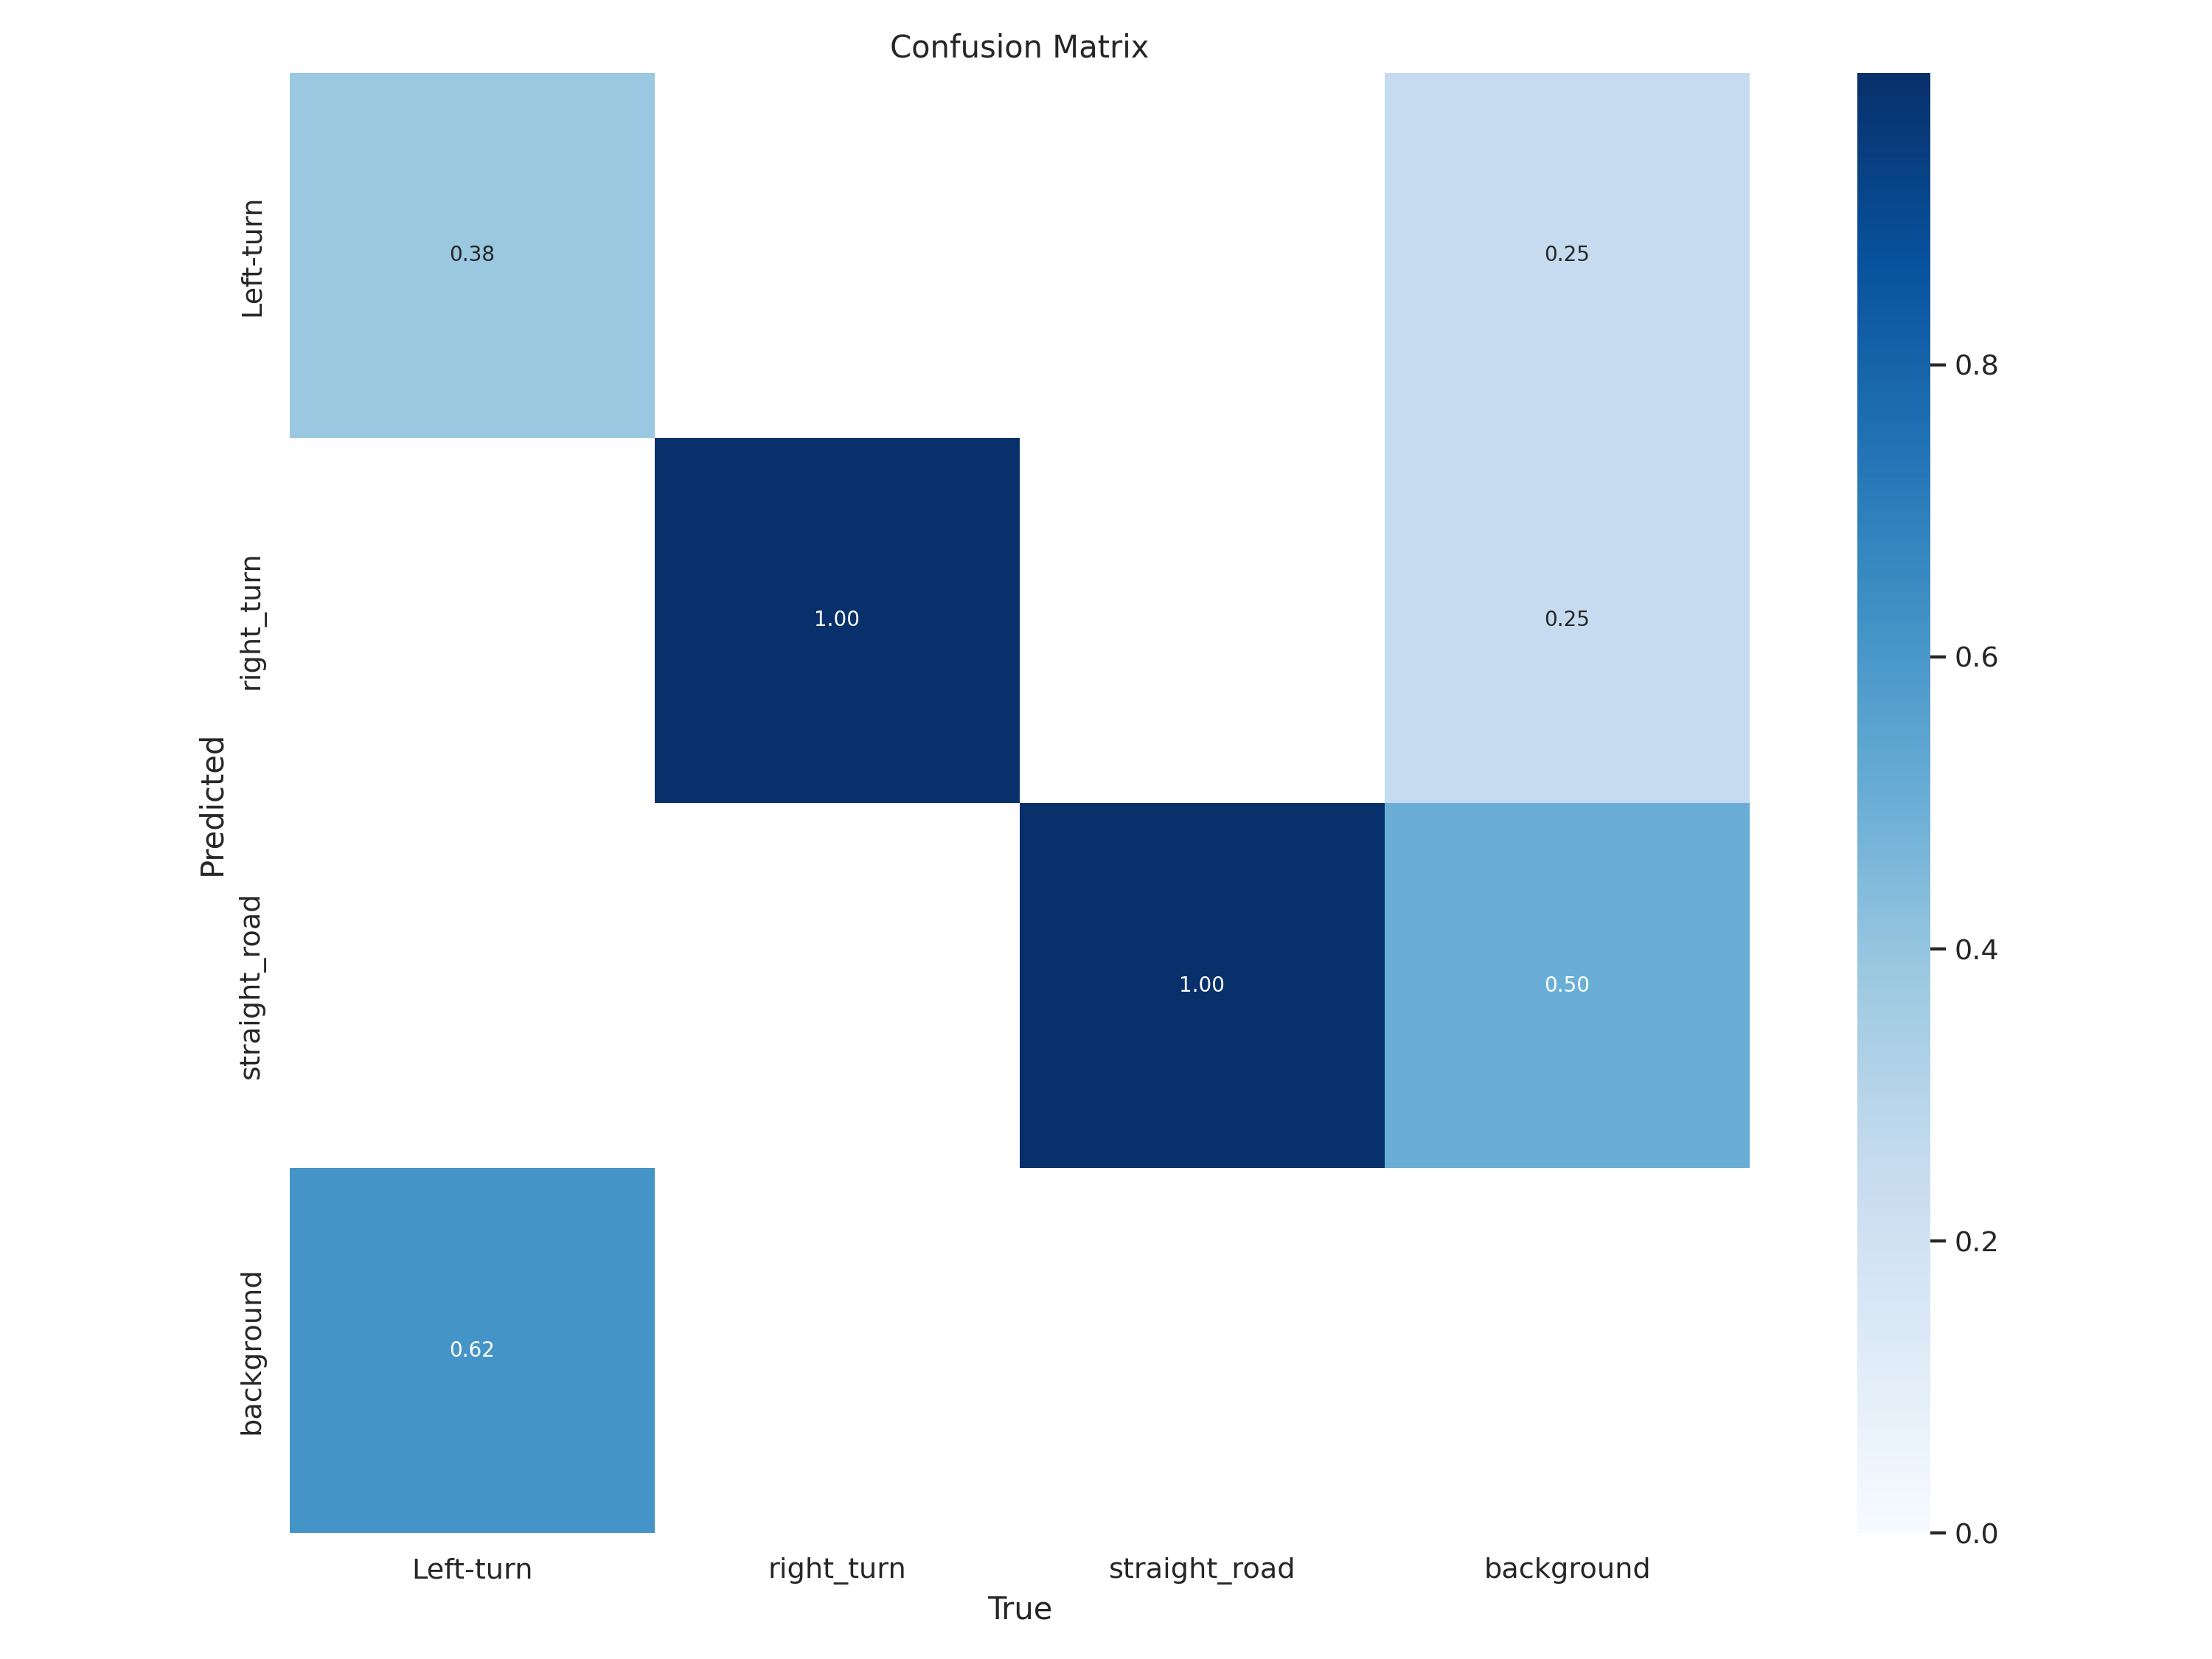

In [21]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

# Overview of labeled data

/content


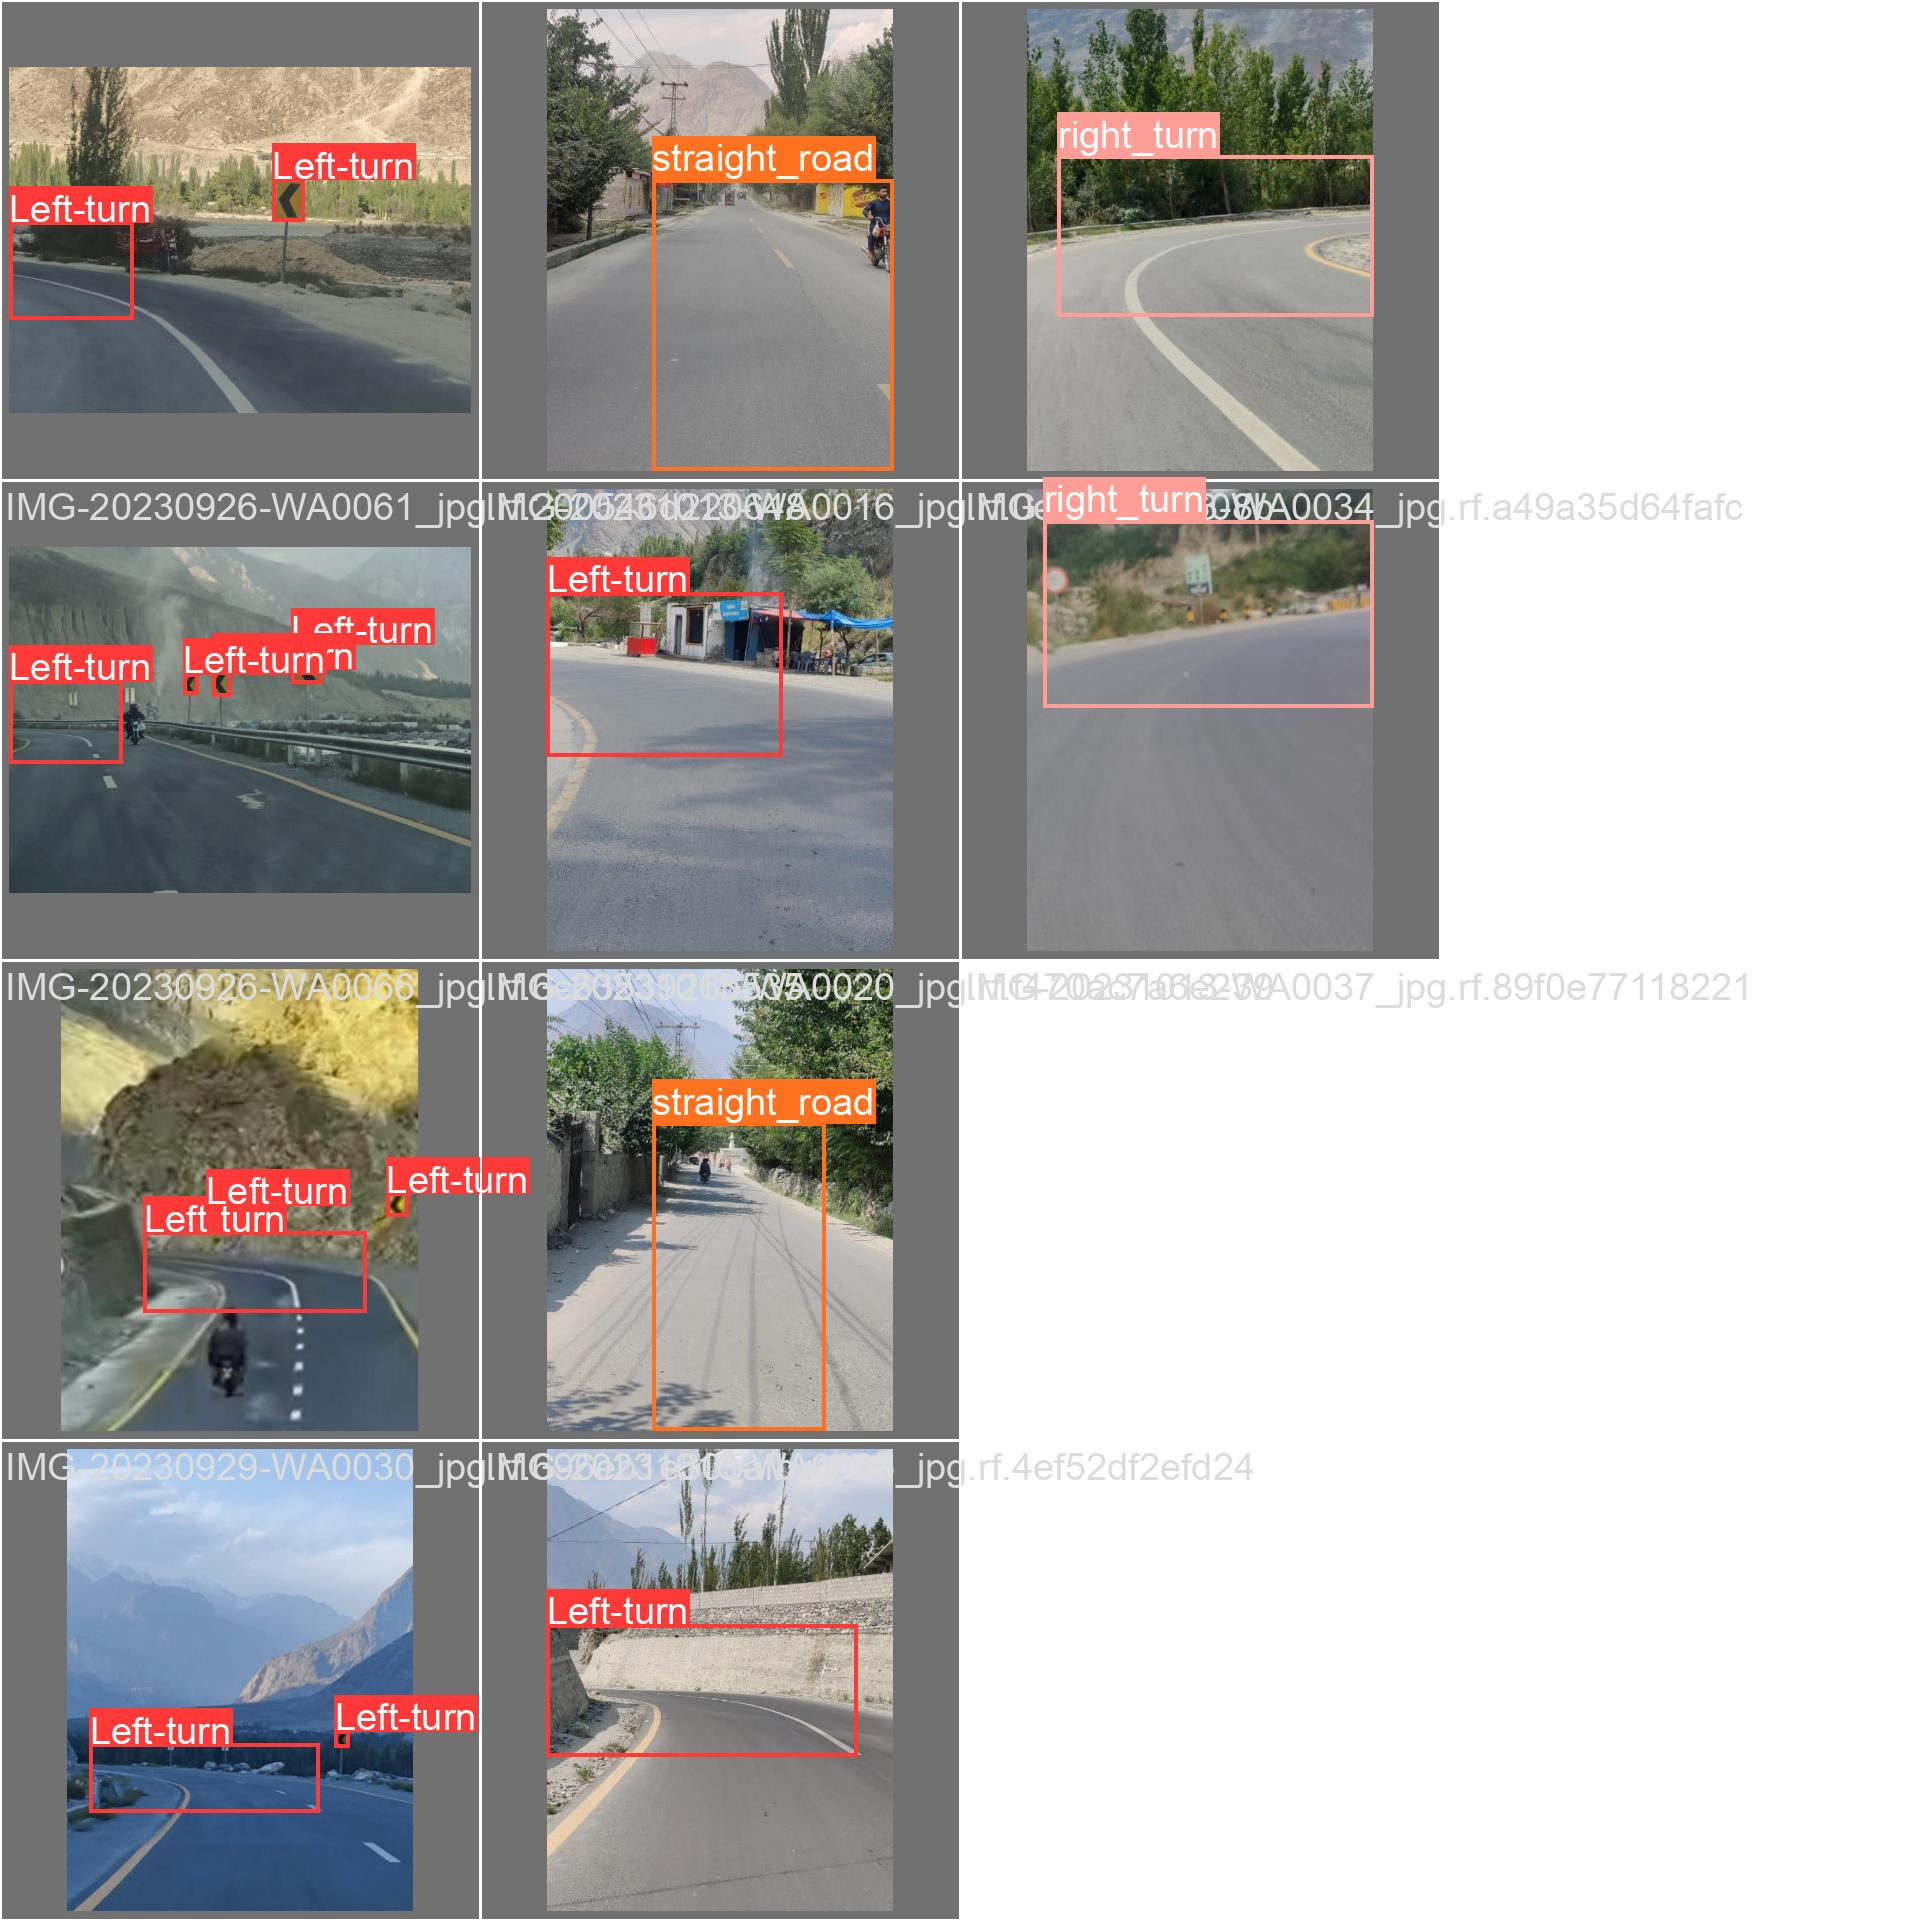

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=800)

# Prediction Result

/content


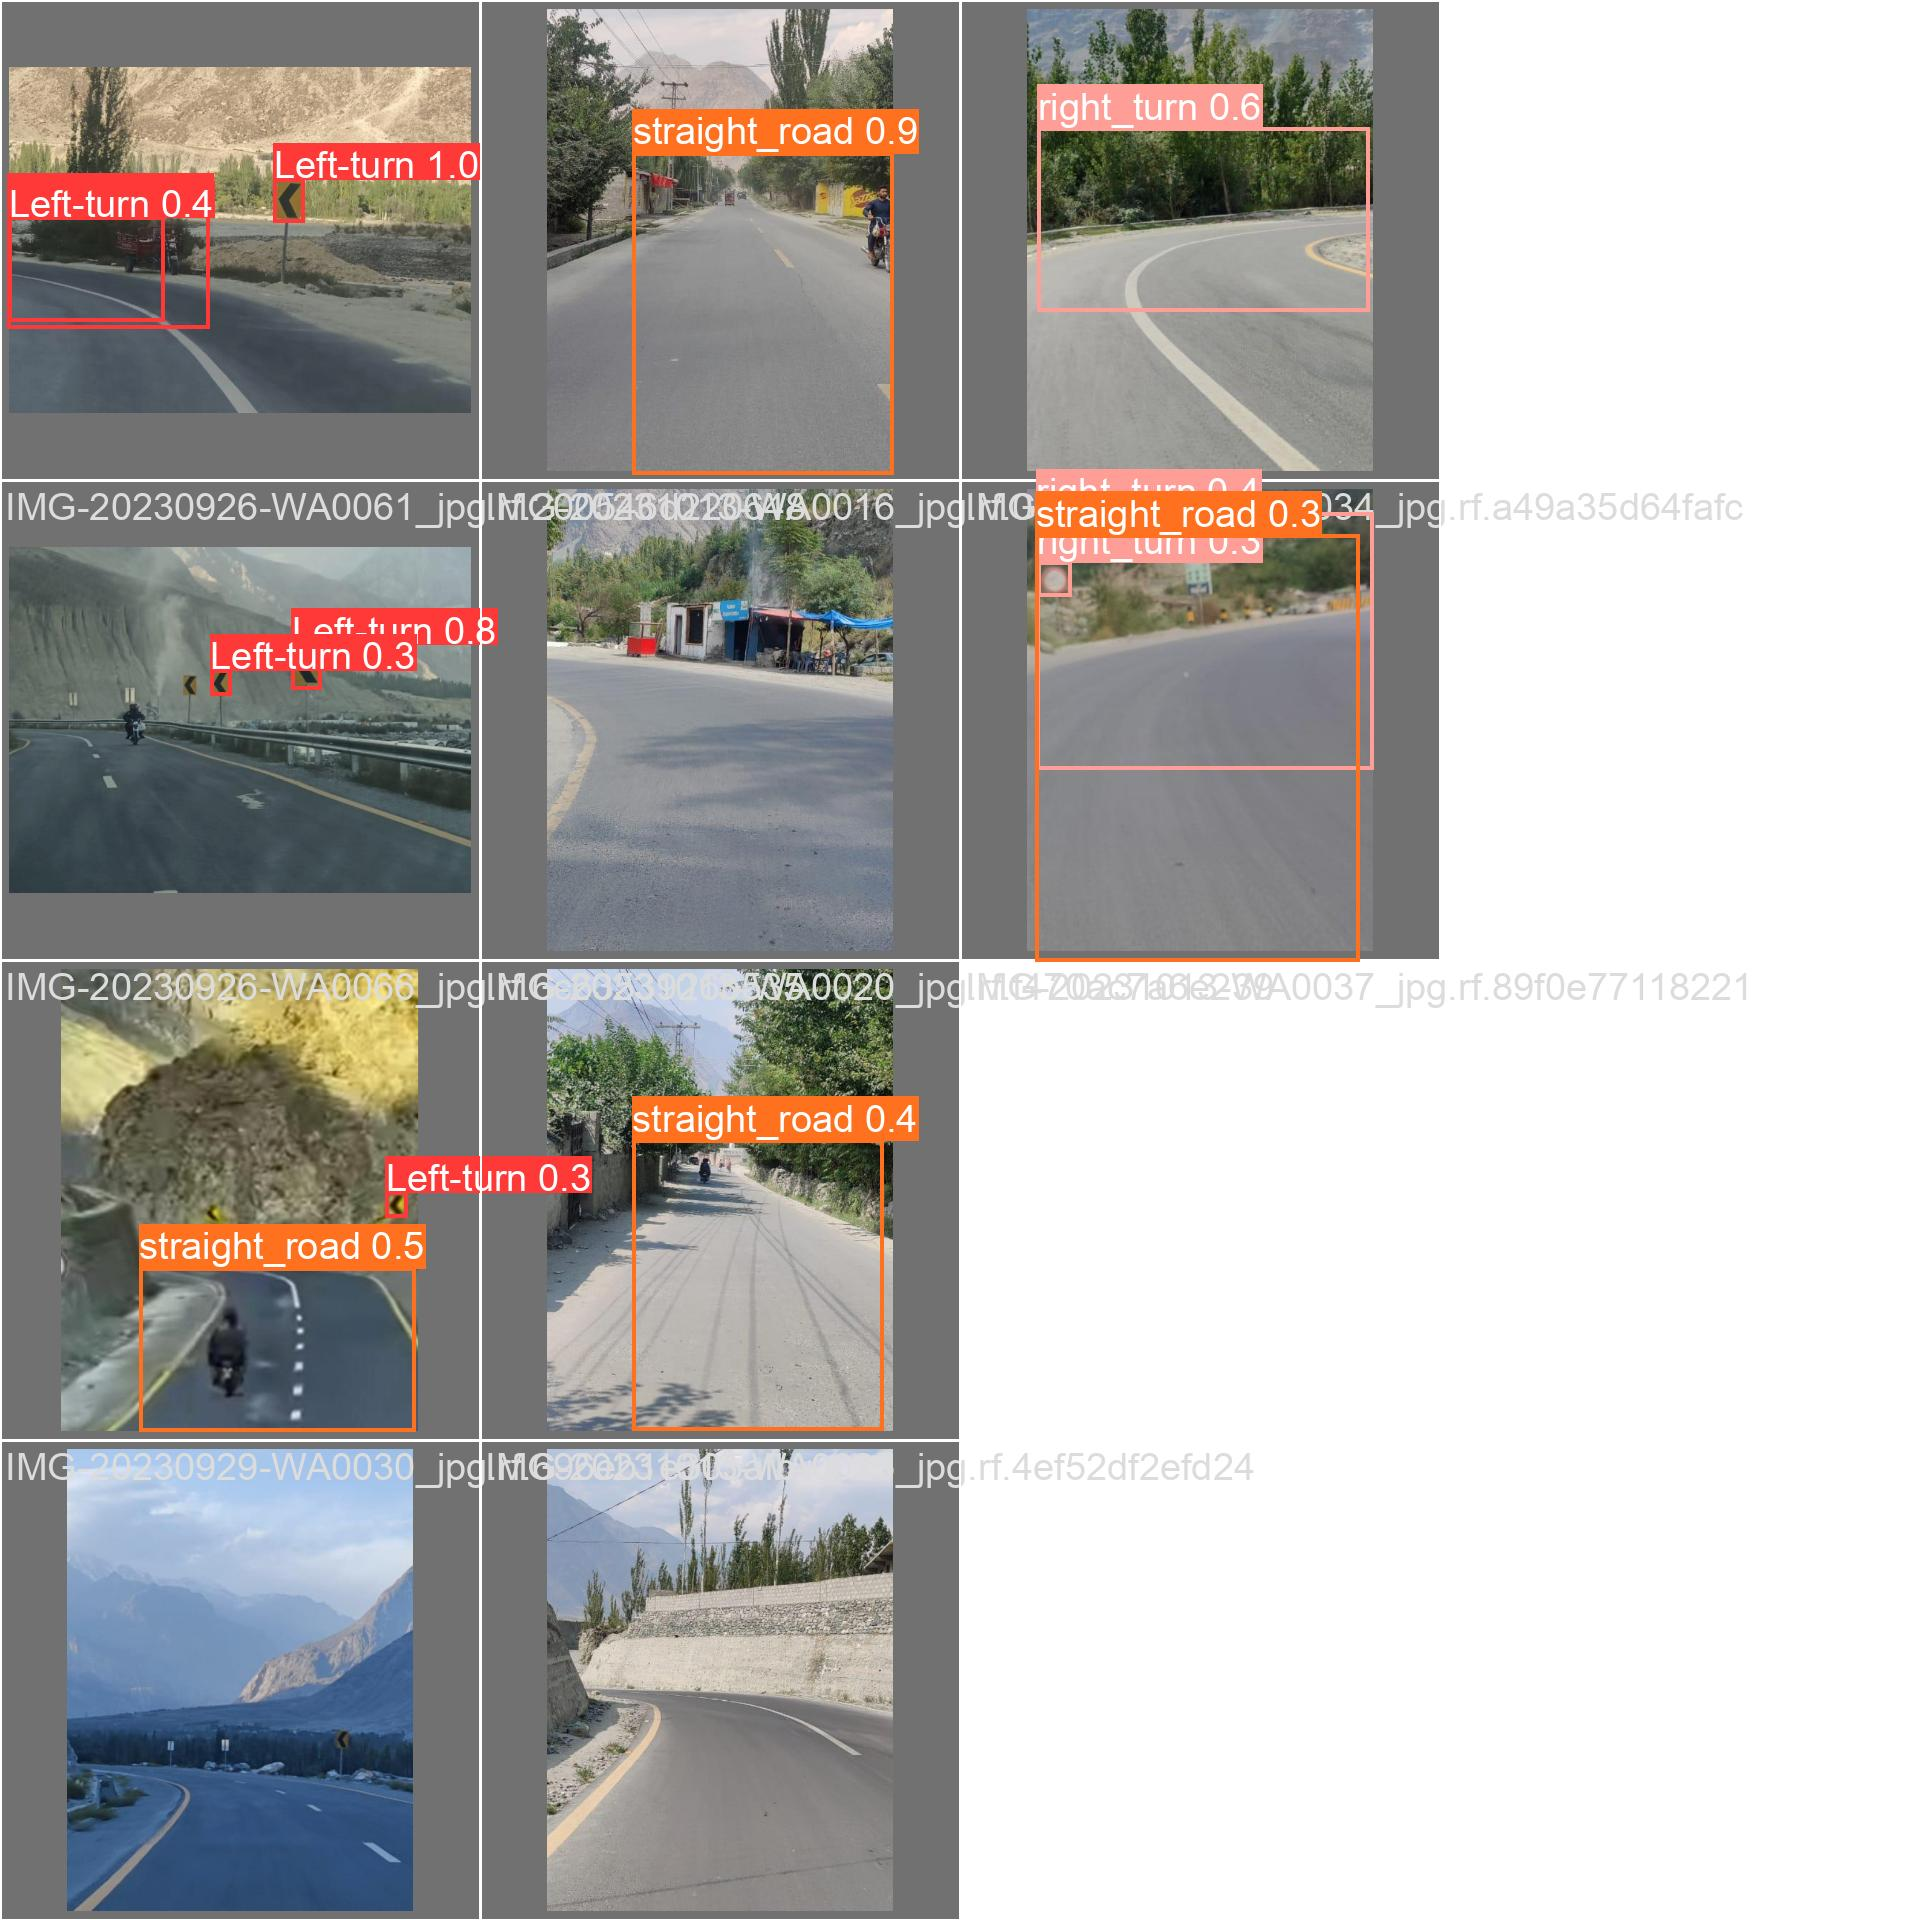

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=700)